In [73]:
# 라이브러리 import
# torchvision 널리 사용되는 데이터 셋 아키텍쳐 모델 computer vision에서의 
# 일반적인 이미지 변환으로 구성되어 있다.
from PIL import Image
#notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것 입니다.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset , DataLoader
import torchvision
from torchvision import transforms
import numpy as np

In [74]:
# 데이터 전처리
# transforms.Compose를 통해 Resize
# torchvision.transforms 다양한 이미지 변환가능하게 제공
# torchvision.transform.Normalize(mean , std m, inplace = False) 평균 과 표준 편차를 사용하여 이미지를 정규화 시켜줌
# torchvision.transform.Compose 여러 transform들을 Compose로 구성된다.
# torchvision.transform.ToTensor PIL이미지 또는 numpy.ndarray를 pytorch의 텐서로 변형
trans = transforms.Compose([transforms.Resize((100,100)),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])
trainset = torchvision.datasets.ImageFolder(root="data/image/",transform=trans)

In [41]:
trainset.__getitem__(1)

(tensor([[[0.5686, 0.5686, 0.5765,  ..., 0.5608, 0.5529, 0.5529],
          [0.5765, 0.5765, 0.5765,  ..., 0.5608, 0.5529, 0.5529],
          [0.5765, 0.5765, 0.5843,  ..., 0.5608, 0.5608, 0.5608],
          ...,
          [0.8588, 0.8667, 0.8745,  ..., 0.9451, 0.9451, 0.9451],
          [0.8588, 0.8588, 0.8588,  ..., 0.9137, 0.9137, 0.9137],
          [0.8353, 0.8118, 0.7882,  ..., 0.7882, 0.7961, 0.8039]],
 
         [[0.7176, 0.7176, 0.7255,  ..., 0.7255, 0.7255, 0.7255],
          [0.7176, 0.7176, 0.7255,  ..., 0.7255, 0.7255, 0.7255],
          [0.7255, 0.7255, 0.7255,  ..., 0.7333, 0.7255, 0.7255],
          ...,
          [0.8118, 0.8118, 0.8196,  ..., 0.8980, 0.8980, 0.8980],
          [0.8118, 0.8118, 0.8196,  ..., 0.8667, 0.8667, 0.8667],
          [0.8039, 0.7804, 0.7569,  ..., 0.7569, 0.7647, 0.7647]],
 
         [[0.8275, 0.8275, 0.8353,  ..., 0.8353, 0.8275, 0.8275],
          [0.8275, 0.8275, 0.8353,  ..., 0.8353, 0.8275, 0.8275],
          [0.8353, 0.8353, 0.8353,  ...,

In [42]:
len(trainset)

1144

In [45]:
classes = trainset.classes

In [69]:
# DataLoder를 사용하여 Batch형식으로 네트워크에 올릴 수 있도록 준비
trainloader = DataLoader(trainset,batch_size=64,shuffle=True,num_workers=16)

In [70]:
'''
DataLoder을 통해 trainset을 감싼후
batch_size 16
shuffle은 원래 train 데이터의 경우 섞는 여부
num_worker = cpu core수
iteration = trainloader에 있는 데이터를 
'''
dataiter = iter(trainloader)
images , labels = dataiter.next()
print(images)

tensor([[[[ 0.7412,  0.7412,  0.7412,  ...,  0.7804,  0.7804,  0.7804],
          [ 0.7412,  0.7412,  0.7412,  ...,  0.7804,  0.7725,  0.7725],
          [ 0.7412,  0.7412,  0.7412,  ...,  0.7725,  0.7725,  0.7725],
          ...,
          [ 0.5843,  0.6235,  0.6784,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.9843,  0.9843,  0.9843,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],

         [[ 0.7490,  0.7490,  0.7490,  ...,  0.7804,  0.7804,  0.7804],
          [ 0.7490,  0.7490,  0.7490,  ...,  0.7804,  0.7725,  0.7725],
          [ 0.7490,  0.7490,  0.7490,  ...,  0.7725,  0.7725,  0.7725],
          ...,
          [ 0.5686,  0.6235,  0.7020,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.9843,  0.9843,  0.9843,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],

         [[ 0.7647,  0.7647,  0.7647,  ...,  0.7961,  0.7961,  0.7961],
          [ 0.7647,  0.7647,  

In [71]:
def imshow(img):
    img = img / 2 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img,(1,2,0)))
    
    print(np_img.shape)
    print((np.transpose(np_img,(1,2,0))).shape)

torch.Size([64, 3, 100, 100])
(3, 1634, 410)
(1634, 410, 3)


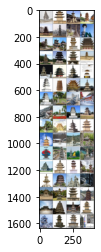

In [72]:
print(images.shape)
imshow(torchvision.utils.make_grid(images,nrow=4))